In [5]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
!pip3 install -U ucimlrepo 


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [24]:
from ucimlrepo import fetch_ucirepo 
  

heart_disease = fetch_ucirepo(id=45) 
  
 
X = heart_disease.data.features 
y = heart_disease.data.targets 
  
print(heart_disease.metadata) 
  
 
print(heart_disease.variables) 


{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'ID': 231, 'type': 'NATIVE', 'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M

1. Perform additional cleaning beyond what you did in Assignment 6. Specify the improvements you made.
- one thing i did to clean up the dataset is to remove duplicates in the code.
- the other thing i did was scale/normalize the data 

In [72]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

X = pd.DataFrame(heart_disease.data.features, columns=heart_disease.data.feature_names) 
y = pd.Series(heart_disease.data.targets.squeeze(),name='Outcomes') 

# remove duplicates
X.drop_duplicates(inplace=True)

X['sexs'] = class_labels.fit_transform(X['sex'].values)
X['sexs'] = class_labels.fit_transform(X['sex'].values)
X['cps'] = class_labels.fit_transform(X['cp'].values)
X['trestbpsx'] = class_labels.fit_transform(X['trestbps'].values)
X['chols'] = class_labels.fit_transform(X['chol'].values) 
X['fbsx'] = class_labels.fit_transform(X['fbs'].values) 
X['restecgs'] = class_labels.fit_transform(X['restecg'].values)  
X['thalachs'] = class_labels.fit_transform(X['thalach'].values)    
X['exangs'] = class_labels.fit_transform(X['exang'].values)  
X['oldpeaks'] = class_labels.fit_transform(X['oldpeak'].values)
X['slopes'] = class_labels.fit_transform(X['slope'].values)
X['cas'] = class_labels.fit_transform(X['ca'].values)  
X['thals'] = class_labels.fit_transform(X['thal'].values)   

#drop NaN
X.fillna(X.mean(), inplace=True)

#scale numbers
scaler = StandardScaler() 
X[X.select_dtypes(include=['float64', 'int64']).columns] = scaler.fit_transform(X.select_dtypes(include=['float64', 'int64']))

X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,trestbpsx,chols,fbsx,restecgs,thalachs,exangs,oldpeaks,slopes,cas,thals
0,0.948726,0.686202,-2.251775,0.757525,-0.264900,2.394438,1.016684,0.017197,-0.696631,1.087338,...,0.843525,-0.244854,2.394438,1.016684,-0.005469,-0.696631,1.180512,2.274579,-0.713129,0.153317
1,1.392002,0.686202,0.877985,1.611220,0.760415,-0.417635,1.016684,-1.821905,1.435481,0.397182,...,1.686124,0.979501,-0.417635,1.016684,-1.851851,1.435481,0.502141,0.649113,2.274127,-0.879017
2,1.392002,0.686202,0.877985,-0.665300,-0.342283,-0.417635,1.016684,-0.902354,1.435481,1.346147,...,-0.748049,-0.349054,-0.417635,1.016684,-0.952332,1.435481,1.471242,0.649113,1.278375,1.185650
3,-1.932564,0.686202,-0.165268,-0.096170,0.063974,-0.417635,-0.996749,1.637359,-0.696631,2.122573,...,0.000927,0.171948,-0.417635,-0.996749,1.651541,-0.696631,2.149612,2.274579,-0.713129,-0.879017
4,-1.489288,-1.457296,-1.208521,-0.096170,-0.825922,-0.417635,1.016684,0.980537,-0.696631,0.310912,...,0.000927,-1.000306,-0.417635,1.016684,1.036081,-0.696631,0.405231,-0.976352,-0.713129,-0.879017


2. Perform combined, oversampling, or undersampling on the dataset you selected for Assignment 6.  Explain why you chose what you did. How did this impact the results of your KNN and Logistic Regression?
   - i chose oversampling because the balance of the dataset was poor so i thought this would be a good option to balance it out. i belive beofere my KNN was lower and now its higher. 

In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier


y = X['slopes']
X = X.drop('slopes', axis = 1)
class_labels = LabelEncoder() 
y = class_labels.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=42,
                                                    stratify=y)
sc = StandardScaler()
X_train = sc.fit_transform(X_train) 
X_test = sc.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=13) 
knn.fit(X_train, y_train) 

y_pred = knn.predict(X_test)
print(y_pred)
print(type(y_pred))

[1 0 0 1 0 0 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 1
 0 1 1 1 0 1 1 0 1 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 1 1 0 0 1 0 0 1 1
 0 1 0 1 0 0 0 0 1 1 0 0 1 0 1 0 0]
<class 'numpy.ndarray'>


In [78]:
print(knn.score(X_test, y_test))

0.7802197802197802


In [79]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)

X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

In [80]:
model = LogisticRegression(random_state=42)
model.fit(X_resampled, y_resampled)

LogisticRegression(random_state=42)

In [81]:
y_pred = model.predict(X_test)

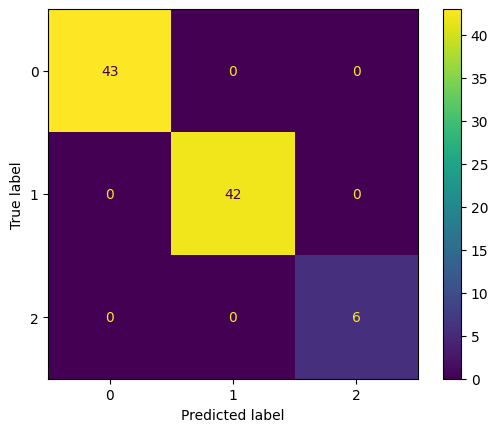

In [82]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)

5. Perform a linear SVM to predict the result from your dataset
   -how did the SVM model preform?
   i think it preformed not well because it all ended up being 1 which is low and not really good for an SVM model bc the higher it is the better.

In [94]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

classifier = SVC(kernel='linear')
classifier.fit(X_resampled,y_resampled)
y_p = classifier.predict(X_test)

print(classification_report(y_test, y_p))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       1.00      1.00      1.00        42
           2       1.00      1.00      1.00         6

    accuracy                           1.00        91
   macro avg       1.00      1.00      1.00        91
weighted avg       1.00      1.00      1.00        91



6. What is outlier detection? Why is it important? What methods can you use for outlier detection?
   - Outlier detection is the identification of points that are strayed far from the dataset. Its important because identifying these outliers could improve the dataset and removes them so the accuracy in the set is better. Some methods i can think of are boxplots, z-scores, and scatter plots. 